In [1]:
#1 : 1
#2 : 1
#3 : 2
#4 : 6
#5 : 24
#6 : 120
#7 : 720

#8 : 5040
#9 : 40320
#10 : 362880


#11 : 3628800
#12 : 39916800
#13 : 479001600
#14 : 6227020800
#15 : 87178291200
#16 : 1307674368000
#17 : 20922789888000
#18 : 355687428096000
#19 : 6402373705728000

In [2]:
from math import factorial

for i in range(1,21):
    fact0 = int(factorial(i) / i)
    print("Number of Stations",  str(i),  ", Combinations: ", str(fact0))

Number of Stations 1 , Combinations:  1
Number of Stations 2 , Combinations:  1
Number of Stations 3 , Combinations:  2
Number of Stations 4 , Combinations:  6
Number of Stations 5 , Combinations:  24
Number of Stations 6 , Combinations:  120
Number of Stations 7 , Combinations:  720
Number of Stations 8 , Combinations:  5040
Number of Stations 9 , Combinations:  40320
Number of Stations 10 , Combinations:  362880
Number of Stations 11 , Combinations:  3628800
Number of Stations 12 , Combinations:  39916800
Number of Stations 13 , Combinations:  479001600
Number of Stations 14 , Combinations:  6227020800
Number of Stations 15 , Combinations:  87178291200
Number of Stations 16 , Combinations:  1307674368000
Number of Stations 17 , Combinations:  20922789888000
Number of Stations 18 , Combinations:  355687428096000
Number of Stations 19 , Combinations:  6402373705728000
Number of Stations 20 , Combinations:  121645100408832000


In [3]:
import pandas as pd
import numpy as np
import time
from datetime import datetime
from utils2 import get_matrix_from_api
from GetRoute import get_route_lat_long

In [4]:
def get_route(location):
    
    route_list = [i for i in range(0, len(location))]
    
    
    return route_list[:]





def get_route_no0(location):
    
    route_list_no0 = [i for i in range(1, len(location))]
    
    return route_list_no0[:]





def population_size(route_list):

    from itertools import combinations, permutations
    from random import shuffle
    from random import randint
    import random
    import numpy as np
    import statistics
    import pandas as pd
    from math import factorial
    import time
    from datetime import datetime
    # total_population = len([i + (0,) for i in permutations(cities_list) if i[0] == 0])
    
    # May take long to get the total count
    # total_population = (i + (0,) for i in permutations(cities_list) if i[0] == 0)
    # population = sum(1 for _ in total_population)
    # n_population = int(round(n_population * 0.3, 0))
    
    
    length = len(route_list)
    
    fact = factorial(length)
    fact0 = int(fact / length)
    
    
    if length <= 3:
        n_population = 2
    
    elif length >= 4 and length <= 5:
        n_population = 5
    
    elif length >= 6 and length <= 8:
        n_population = 100
    
    elif length >= 9 and length <= 12:
        n_population = 2000
    
    elif length >= 13 and length <= 20:
        n_population = 3000
   
    else:
        n_population = 5000
    
    
    # n_population = int(round(fact0 * 0.30, 0))
    
    
    return n_population





def initial_population(route_list_no0, n_population = 10):

    from itertools import combinations, permutations
    from random import shuffle
    from random import randint
    import random
    import numpy as np
    import statistics
    import pandas as pd
    from math import factorial
    import time
    from datetime import datetime
    
    # Randomly generate list of routes
    population_perms = []


    # route_list_no0 = [1,2,3,4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

    route_list_no0 = np.array(route_list_no0)

    i = 0
    while i < n_population:

        route_permute = np.random.permutation(route_list_no0).tolist()
        route_permute.insert(0, 0)
        route_permute.insert(len(route_permute),0)

        if route_permute not in population_perms:
            population_perms.append(route_permute)

        i = len(population_perms)

    return population_perms





# original
def initial_population2(route_list, n_population = 10):
    
    population_perms = []
    possible_perms = [i + (0,) for i in permutations(route_list) if i[0] == 0]
    random_ids = random.sample(range(0,len(possible_perms)),n_population)
    for i in random_ids:
        population_perms.append(list(possible_perms[i]))
        
    return population_perms





def total_dist_individual(individual, dist_matrix):
    
    from itertools import combinations, permutations
    from random import shuffle
    from random import randint
    import random
    import numpy as np
    import statistics
    import pandas as pd
    from math import factorial
    import time
    from datetime import datetime    
    
    #total_dist = 0
    #for i in range(0, len(individual)):
        #if(i == len(individual) - 1):
        #   total_dist += dist_two_cities(individual[i], individual[0])  # back to first
        #else:
        #    total_dist += dist_two_cities(individual[i], individual[i+1])
    
    total_dist = 0
    end = len(individual)  
    for i, j in zip(individual[0:end-1], individual[1:end]):
        
        total_dist += dist_matrix[i][j]
        # total_dist += matrix[i][j]
    
    return total_dist





def fitness_prob(population, dist_matrix):
    
    from itertools import combinations, permutations
    from random import shuffle
    from random import randint
    import random
    import numpy as np
    import statistics
    import pandas as pd
    from math import factorial
    import time
    from datetime import datetime
    # Shorter total distance will have higher score
    
    total_dist_all_individuals = []
    for i in range (0, len(population)):
        total_dist_all_individuals.append(total_dist_individual(population[i], dist_matrix))
        
    max_population_cost = max(total_dist_all_individuals)
    population_fitness = max_population_cost - total_dist_all_individuals
    population_fitness_sum = sum(population_fitness)
    population_fitness_probs = population_fitness / population_fitness_sum
    return population_fitness_probs





def roulette_wheel(population, fitness_probs):
    
    from itertools import combinations, permutations
    from random import shuffle
    from random import randint
    import random
    import numpy as np
    import statistics
    import pandas as pd
    from math import factorial
    import time
    from datetime import datetime   
    
    # selection process
    # individuals with higher fitness values have a higher probability of being chosen for reproduction
    population_fitness_probs_cumsum = fitness_probs.cumsum()
    bool_prob_array = population_fitness_probs_cumsum < np.random.uniform(0,1,1)
    selected_individual_index = len(bool_prob_array[bool_prob_array == True]) - 1
    return population[selected_individual_index]




def crossover(route_list, parent_1, parent_2):
    
    from itertools import combinations, permutations
    from random import shuffle
    from random import randint
    import random
    import numpy as np
    import statistics
    import pandas as pd
    from math import factorial
    import time
    from datetime import datetime   
    
    #　n_cities_cut = len(aa) - 1
    #　cut = round(random.uniform(1, n_cities_cut))
    
    # replace half of gene
    cut = round(len(route_list)/2)-1
    
    offspring_1 = []
    offspring_2 = []
    
    offspring_1 = parent_1 [0:cut]
    offspring_1 += [city for city in parent_2 if city not in offspring_1]
    offspring_1.append(0)
    
    offspring_2 = parent_2 [0:cut]
    offspring_2 += [city for city in parent_1 if city not in offspring_2]
    offspring_2.append(0)
    
    
    return offspring_1, offspring_2





def mutation(route_list, offspring):
    
    from itertools import combinations, permutations
    from random import shuffle
    from random import randint
    import random
    import numpy as np
    import statistics
    import pandas as pd
    from math import factorial
    import time
    from datetime import datetime   
        
    n_cities_cut = len(route_list) - 1
    
    index_1 = 0
    index_2 = 0
    while index_1 == index_2:
        index_1 = round(randint(1, n_cities_cut))
        index_2 = round(randint(1, n_cities_cut))

    temp = offspring [index_1]
    offspring[index_1] = offspring[index_2]
    offspring[index_2] = temp
    
    return(offspring)




#8:2 Replace new -> old
def genetic(route_list, route_list_no0, dist_matrix, n_population, n_generations, crossover_per, mutation_per):
     
    from itertools import combinations, permutations
    from random import shuffle
    from random import randint
    import random
    import numpy as np
    import statistics
    import pandas as pd
    from math import factorial
    import time
    from datetime import datetime   
       
    
    population = initial_population(route_list_no0, n_population)
    fitness_probs = fitness_prob(population, dist_matrix)
    
    # print(len(population))
    
    select = int(crossover_per * n_population)
    if (select % 2) == 0:
            select = select
    else:
            select = select + 1
    
    
    parents_list = []
    for i in range(0, select):
        parents_list.append(roulette_wheel(population, fitness_probs))

    offspring_list = []    
    for i in range(0,len(parents_list), 2):
        offspring_1, offspring_2 = crossover(route_list, parents_list[i], parents_list[i+1])

    #     print(offspring_1)
    #     print(offspring_2)
    #     print()

        mutate_threashold = random.random()
        if(mutate_threashold > (1-mutation_per)):
            offspring_1 = mutation(route_list, offspring_1)
    #         print("Offspring 1 mutated", offspring_1)

        mutate_threashold = random.random()
        if(mutate_threashold > (1-mutation_per)):
            offspring_2 = mutation(route_list, offspring_2)
    #         print("Offspring 2 mutated", offspring_2)


        offspring_list.append(offspring_1)
        offspring_list.append(offspring_2)

    mixed_offspring = parents_list + offspring_list

    fitness_probs = fitness_prob(mixed_offspring, dist_matrix)
    sorted_fitness_indices = np.argsort(fitness_probs)[::-1]
    best_fitness_indices = sorted_fitness_indices[0:n_population]
    best_mixed_offspring = []
    for i in best_fitness_indices:
        best_mixed_offspring.append(mixed_offspring[i])


    for i in range(0, n_generations):
        # if (i%10 == 0):
            # print("Generation: ", i)
        
        fitness_probs = fitness_prob(best_mixed_offspring, dist_matrix)
        parents_list = []
        for i in range(0, select):
            parents_list.append(roulette_wheel(best_mixed_offspring, fitness_probs))

        offspring_list = []    
        for i in range(0,len(parents_list), 2):
            offspring_1, offspring_2 = crossover(route_list, parents_list[i], parents_list[i+1])

            mutate_threashold = random.random()
            if(mutate_threashold > (1-mutation_per)):
                offspring_1 = mutation(route_list, offspring_1)

            mutate_threashold = random.random()
            if(mutate_threashold > (1-mutation_per)):
                offspring_2 = mutation(route_list, offspring_2)

            offspring_list.append(offspring_1)
            offspring_list.append(offspring_2)


        mixed_offspring = parents_list + offspring_list
        fitness_probs = fitness_prob(mixed_offspring, dist_matrix)
        sorted_fitness_indices = np.argsort(fitness_probs)[::-1]
        best_fitness_indices = sorted_fitness_indices[0:int(0.8*n_population)]

        best_mixed_offspring = []
        for i in best_fitness_indices:
            best_mixed_offspring.append(mixed_offspring[i])
            
        old_population_indices = [random.randint(0, (n_population - 1)) for j in range(int(0.2*n_population))]
        
        
        #print(len(best_mixed_offspring))
        #print(old_population_indices)
        #print(len(population))
        #print(n_population)
        
        for i in old_population_indices:
            # print(i)
            best_mixed_offspring.append(population[i])
            
        random.shuffle(best_mixed_offspring)
            
    return best_mixed_offspring



#6:4 Replace new -> old
def genetic2(route_list, route_list_no0, dist_matrix, n_population, n_generations, crossover_per, mutation_per):
     
    from itertools import combinations, permutations
    from random import shuffle
    from random import randint
    import random
    import numpy as np
    import statistics
    import pandas as pd
    from math import factorial
    import time
    from datetime import datetime   
       
    
    population = initial_population(route_list_no0, n_population)
    fitness_probs = fitness_prob(population, dist_matrix)
    
    # print(len(population))
    
    select = int(crossover_per * n_population)
    if (select % 2) == 0:
            select = select
    else:
            select = select + 1
    
    
    parents_list = []
    for i in range(0, select):
        parents_list.append(roulette_wheel(population, fitness_probs))

    offspring_list = []    
    for i in range(0,len(parents_list), 2):
        offspring_1, offspring_2 = crossover(route_list, parents_list[i], parents_list[i+1])

    #     print(offspring_1)
    #     print(offspring_2)
    #     print()

        mutate_threashold = random.random()
        if(mutate_threashold > (1-mutation_per)):
            offspring_1 = mutation(route_list, offspring_1)
    #         print("Offspring 1 mutated", offspring_1)

        mutate_threashold = random.random()
        if(mutate_threashold > (1-mutation_per)):
            offspring_2 = mutation(route_list, offspring_2)
    #         print("Offspring 2 mutated", offspring_2)


        offspring_list.append(offspring_1)
        offspring_list.append(offspring_2)

    mixed_offspring = parents_list + offspring_list

    fitness_probs = fitness_prob(mixed_offspring, dist_matrix)
    sorted_fitness_indices = np.argsort(fitness_probs)[::-1]
    best_fitness_indices = sorted_fitness_indices[0:n_population]
    best_mixed_offspring = []
    for i in best_fitness_indices:
        best_mixed_offspring.append(mixed_offspring[i])


    for i in range(0, n_generations):
        # if (i%10 == 0):
            # print("Generation: ", i)
        
        fitness_probs = fitness_prob(best_mixed_offspring, dist_matrix)
        parents_list = []
        for i in range(0, select):
            parents_list.append(roulette_wheel(best_mixed_offspring, fitness_probs))

        offspring_list = []    
        for i in range(0,len(parents_list), 2):
            offspring_1, offspring_2 = crossover(route_list, parents_list[i], parents_list[i+1])

            mutate_threashold = random.random()
            if(mutate_threashold > (1-mutation_per)):
                offspring_1 = mutation(route_list, offspring_1)

            mutate_threashold = random.random()
            if(mutate_threashold > (1-mutation_per)):
                offspring_2 = mutation(route_list, offspring_2)

            offspring_list.append(offspring_1)
            offspring_list.append(offspring_2)


        mixed_offspring = parents_list + offspring_list
        fitness_probs = fitness_prob(mixed_offspring, dist_matrix)
        sorted_fitness_indices = np.argsort(fitness_probs)[::-1]
        best_fitness_indices = sorted_fitness_indices[0:int(0.6*n_population)]

        best_mixed_offspring = []
        for i in best_fitness_indices:
            best_mixed_offspring.append(mixed_offspring[i])
            
        old_population_indices = [random.randint(0, (n_population - 1)) for j in range(int(0.4*n_population))]
        
        
        #print(len(best_mixed_offspring))
        #print(old_population_indices)
        #print(len(population))
        #print(n_population)
        
        for i in old_population_indices:
            # print(i)
            best_mixed_offspring.append(population[i])
            
        random.shuffle(best_mixed_offspring)
            
    return best_mixed_offspring




def genetic_route(route_list, route_list_no0, n_population, n_generations, crossover_per, mutation_per, dist_matrix, dura_matrix):
    
    from itertools import combinations, permutations
    from random import shuffle
    from random import randint
    import random
    import numpy as np
    import statistics
    import pandas as pd
    from math import factorial
    import time
    from datetime import datetime
    
    
    
    best_mixed_offspring = genetic(route_list, route_list_no0, dist_matrix, n_population, n_generations, crossover_per, mutation_per)

    total_dist_all_individuals = []
    for i in range(0, n_population-1):
        total_dist_all_individuals.append(total_dist_individual(best_mixed_offspring[i], dist_matrix))

    index_minimum = np.argmin(total_dist_all_individuals)

    distance = min(total_dist_all_individuals)
    route = best_mixed_offspring[index_minimum]
    
    
    
    # Calculate duration
    dura = 0
    r = route
    end = len(route)
    for i, j in zip(r[0:end-1], r[1:end]):
        
        dura += dura_matrix[i][j]
        
    
    duration = round(dura / 60)
    
    distance = round(distance / 1609)
    
    
    return route, distance, duration




def genetic_route2(route_list, route_list_no0, n_population, n_generations, crossover_per, mutation_per, dist_matrix, dura_matrix):
    
    from itertools import combinations, permutations
    from random import shuffle
    from random import randint
    import random
    import numpy as np
    import statistics
    import pandas as pd
    from math import factorial
    import time
    from datetime import datetime
    
    
    
    best_mixed_offspring = genetic2(route_list, route_list_no0, dist_matrix, n_population, n_generations, crossover_per, mutation_per)

    total_dist_all_individuals = []
    for i in range(0, n_population-1):
        total_dist_all_individuals.append(total_dist_individual(best_mixed_offspring[i], dist_matrix))

    index_minimum = np.argmin(total_dist_all_individuals)

    distance = min(total_dist_all_individuals)
    route = best_mixed_offspring[index_minimum]
    
    
    
    # Calculate duration
    dura = 0
    r = route
    end = len(route)
    for i, j in zip(r[0:end-1], r[1:end]):
        
        dura += dura_matrix[i][j]
        
    
    duration = round(dura / 60)
    
    distance = round(distance / 1609)
    
    
    return route, distance, duration


In [5]:
a = [
(33.9697702,-83.96162849999999),
(34.0855533852, -83.9455640476),
(33.8530741685, -83.9985179404),
(33.978323909, -83.9402479833),
(34.1441012544, -84.0348410659),
(33.7745208966, -84.0488169856),
(34.0183517233, -83.9039972317),
(33.9127822128, -83.8943183944),
(34.0387634682, -84.0262908335),
(34.0358304517, -83.8991189891),
(33.926389675, -83.9431847443)
]

## GA 8:2 Replace ##

In [31]:
route_list = get_route(a)
route_list_no0 = get_route_no0(a)
dist_matrix, dura_matrix = get_matrix_from_api(a)

ga_route = []
ga_distance = []
ga_duration = []
ga_time = []




#n_population = population_size(route_list)
n_population = [100, 200, 500, 1000, 2000, 3000, 5000, 10000, 20000]
crossover_per = 0.8
mutation_per = 0.2
n_generations = 500


for i in range(0, len(n_population)):

    start_time = time.time()

    route, distance, duration = genetic_route(route_list, 
                                                    route_list_no0, 
                                                    n_population[i], 
                                                    n_generations, 
                                                    crossover_per, 
                                                    mutation_per,
                                                    dist_matrix,
                                                    dura_matrix)
    route_real = get_route_lat_long(a, route)

    end_time = time.time()


    ga_route.append(route)
    ga_distance.append(distance)
    ga_duration.append(duration)
    ga_time.append(end_time - start_time)

    
print(ga_route)
print(ga_distance)
print(ga_duration)
print(ga_time)

[[0, 10, 7, 2, 5, 8, 4, 1, 9, 6, 3, 0], [0, 10, 7, 2, 5, 8, 4, 1, 9, 6, 3, 0], [0, 5, 2, 7, 10, 8, 4, 1, 9, 6, 3, 0], [0, 10, 7, 2, 5, 8, 4, 1, 9, 6, 3, 0], [0, 10, 7, 2, 5, 8, 4, 1, 9, 6, 3, 0], [0, 10, 7, 2, 5, 8, 4, 1, 9, 6, 3, 0], [0, 10, 7, 2, 5, 8, 4, 1, 9, 6, 3, 0], [0, 10, 7, 2, 5, 8, 4, 1, 9, 6, 3, 0], [0, 10, 7, 2, 5, 8, 4, 1, 9, 6, 3, 0]]
[84, 84, 84, 84, 84, 84, 84, 84, 84]
[172, 172, 175, 172, 172, 172, 172, 172, 172]
[1.6953644752502441, 3.3394875526428223, 8.538111209869385, 18.1035475730896, 42.63739991188049, 68.77065467834473, 130.140771150589, 337.5293695926666, 1034.6572387218475]


In [12]:
route_list = get_route(a)
route_list_no0 = get_route_no0(a)
dist_matrix, dura_matrix = get_matrix_from_api(a)

ga_route = []
ga_distance = []
ga_duration = []
ga_time = []




#n_population = population_size(route_list)
n_population = 500
crossover_per = [0.5, 0.6, 0.7, 0.8, 0.9]
mutation_per = 0.2
n_generations = 500


for i in range(0, len(crossover_per)):

    start_time = time.time()

    route, distance, duration = genetic_route(route_list, 
                                                    route_list_no0, 
                                                    n_population, 
                                                    n_generations, 
                                                    crossover_per[i], 
                                                    mutation_per,
                                                    dist_matrix,
                                                    dura_matrix)
    route_real = get_route_lat_long(a, route)

    end_time = time.time()


    ga_route.append(route)
    ga_distance.append(distance)
    ga_duration.append(duration)
    ga_time.append(end_time - start_time)

    
print(ga_route)
print(ga_distance)
print(ga_duration)
print(ga_time)

[[0, 10, 2, 5, 7, 3, 6, 9, 4, 1, 8, 0], [0, 5, 2, 7, 10, 3, 8, 4, 1, 9, 6, 0], [0, 5, 2, 7, 10, 8, 4, 1, 9, 6, 3, 0], [0, 10, 7, 2, 5, 8, 4, 1, 9, 6, 3, 0], [0, 10, 7, 2, 5, 8, 4, 1, 9, 6, 3, 0]]
[92, 88, 84, 84, 84]
[189, 179, 175, 172, 172]
[6.4626946449279785, 7.326026201248169, 8.165913581848145, 9.699562311172485, 9.708798170089722]


In [6]:
route_list = get_route(a)
route_list_no0 = get_route_no0(a)
dist_matrix, dura_matrix = get_matrix_from_api(a)

ga_route = []
ga_distance = []
ga_duration = []
ga_time = []




#n_population = population_size(route_list)
n_population = 500
crossover_per = 0.8
mutation_per = [0.2, 0.4, 0.6]
n_generations = 500


for i in range(0, len(mutation_per)):

    start_time = time.time()

    route, distance, duration = genetic_route(route_list, 
                                                    route_list_no0, 
                                                    n_population, 
                                                    n_generations, 
                                                    crossover_per, 
                                                    mutation_per[i],
                                                    dist_matrix,
                                                    dura_matrix)
    route_real = get_route_lat_long(a, route)

    end_time = time.time()


    ga_route.append(route)
    ga_distance.append(distance)
    ga_duration.append(duration)
    ga_time.append(end_time - start_time)
    

print(ga_route)
print(ga_distance)
print(ga_duration)
print(ga_time)

[[0, 3, 6, 9, 1, 4, 8, 5, 2, 7, 10, 0], [0, 5, 2, 7, 10, 8, 4, 1, 9, 6, 3, 0], [0, 10, 7, 2, 5, 8, 4, 1, 9, 6, 3, 0]]
[83, 84, 84]
[171, 175, 172]
[8.546354293823242, 8.538275480270386, 9.055771350860596]


In [7]:
route_list = get_route(a)
route_list_no0 = get_route_no0(a)
dist_matrix, dura_matrix = get_matrix_from_api(a)

ga_route = []
ga_distance = []
ga_duration = []
ga_time = []




#n_population = population_size(route_list)
n_population = 500
crossover_per = 0.8
mutation_per = 0.2
n_generations = [500, 1000, 2000, 5000]

for i in range(0, len(n_generations)):

    start_time = time.time()

    route, distance, duration = genetic_route(route_list, 
                                                    route_list_no0, 
                                                    n_population, 
                                                    n_generations[i], 
                                                    crossover_per, 
                                                    mutation_per,
                                                    dist_matrix,
                                                    dura_matrix)
    route_real = get_route_lat_long(a, route)

    end_time = time.time()


    ga_route.append(route)
    ga_distance.append(distance)
    ga_duration.append(duration)
    ga_time.append(end_time - start_time)
    

print(ga_route)
print(ga_distance)
print(ga_duration)
print(ga_time)

[[0, 10, 7, 2, 5, 8, 4, 1, 9, 6, 3, 0], [0, 5, 2, 7, 10, 8, 4, 1, 9, 6, 3, 0], [0, 5, 2, 7, 10, 3, 6, 9, 1, 4, 8, 0], [0, 10, 7, 2, 5, 8, 4, 1, 9, 6, 3, 0]]
[84, 84, 84, 84]
[172, 175, 174, 172]
[8.91175103187561, 17.01285433769226, 33.45105218887329, 85.40087342262268]


## GA 6:4 Replace ##

In [8]:
route_list = get_route(a)
route_list_no0 = get_route_no0(a)
dist_matrix, dura_matrix = get_matrix_from_api(a)

ga_route2 = []
ga_distance2 = []
ga_duration2 = []
ga_time2 = []




#n_population = population_size(route_list)
n_population = [100, 200, 500, 1000, 2000, 3000, 5000, 10000, 20000]
crossover_per = 0.8
mutation_per = 0.2
n_generations = 500


for i in range(0, len(n_population)):

    start_time = time.time()

    route, distance, duration = genetic_route2(route_list, 
                                                    route_list_no0, 
                                                    n_population[i], 
                                                    n_generations, 
                                                    crossover_per, 
                                                    mutation_per,
                                                    dist_matrix,
                                                    dura_matrix)
    route_real = get_route_lat_long(a, route)

    end_time = time.time()


    ga_route2.append(route)
    ga_distance2.append(distance)
    ga_duration2.append(duration)
    ga_time2.append(end_time - start_time)

    
print(ga_route2)
print(ga_distance2)
print(ga_duration2)
print(ga_time2)

[[0, 5, 2, 7, 10, 3, 6, 9, 1, 4, 8, 0], [0, 5, 2, 7, 10, 8, 4, 1, 9, 6, 3, 0], [0, 5, 2, 7, 10, 8, 4, 1, 9, 6, 3, 0], [0, 10, 7, 2, 5, 8, 4, 1, 9, 6, 3, 0], [0, 10, 7, 2, 5, 8, 4, 1, 9, 6, 3, 0], [0, 5, 2, 7, 10, 8, 4, 1, 9, 6, 3, 0], [0, 10, 7, 2, 5, 8, 4, 1, 9, 6, 3, 0], [0, 10, 7, 2, 5, 8, 4, 1, 9, 6, 3, 0], [0, 10, 7, 2, 5, 8, 4, 1, 9, 6, 3, 0]]
[84, 84, 84, 84, 84, 84, 84, 84, 84]
[174, 175, 175, 172, 172, 175, 172, 172, 172]
[1.598616361618042, 3.3278791904449463, 8.549723148345947, 18.088021755218506, 40.31901836395264, 64.0283432006836, 125.49782133102417, 331.6934609413147, 1046.6381194591522]


In [14]:
route_list = get_route(a)
route_list_no0 = get_route_no0(a)
dist_matrix, dura_matrix = get_matrix_from_api(a)

ga_route2 = []
ga_distance2 = []
ga_duration2 = []
ga_time2 = []




#n_population = population_size(route_list)
n_population = 500
crossover_per = [0.5, 0.6, 0.7, 0.8, 0.9]
mutation_per = 0.2
n_generations = 500


for i in range(0, len(crossover_per)):

    start_time = time.time()

    route, distance, duration = genetic_route2(route_list, 
                                                    route_list_no0, 
                                                    n_population, 
                                                    n_generations, 
                                                    crossover_per[i], 
                                                    mutation_per,
                                                    dist_matrix,
                                                    dura_matrix)
    route_real = get_route_lat_long(a, route)

    end_time = time.time()


    ga_route2.append(route)
    ga_distance2.append(distance)
    ga_duration2.append(duration)
    ga_time2.append(end_time - start_time)

    
print(ga_route2)
print(ga_distance2)
print(ga_duration2)
print(ga_time2)

[[0, 3, 6, 9, 4, 1, 8, 10, 5, 2, 7, 0], [0, 5, 2, 7, 10, 8, 4, 1, 9, 6, 3, 0], [0, 5, 2, 7, 10, 8, 4, 1, 9, 6, 3, 0], [0, 5, 2, 7, 10, 8, 4, 1, 9, 6, 3, 0], [0, 10, 7, 2, 5, 8, 4, 1, 9, 6, 3, 0]]
[91, 84, 84, 84, 84]
[187, 175, 175, 175, 172]
[6.839401721954346, 7.350427627563477, 8.278192043304443, 8.999601364135742, 10.203378915786743]


In [8]:
route_list = get_route(a)
route_list_no0 = get_route_no0(a)
dist_matrix, dura_matrix = get_matrix_from_api(a)

ga_route2 = []
ga_distance2 = []
ga_duration2 = []
ga_time2 = []




#n_population = population_size(route_list)
n_population = 500
crossover_per = 0.8
mutation_per = [0.2, 0.4, 0.6]
n_generations = 500


for i in range(0, len(mutation_per)):

    start_time = time.time()

    route, distance, duration = genetic_route2(route_list, 
                                                    route_list_no0, 
                                                    n_population, 
                                                    n_generations, 
                                                    crossover_per, 
                                                    mutation_per[i],
                                                    dist_matrix,
                                                    dura_matrix)
    route_real = get_route_lat_long(a, route)

    end_time = time.time()


    ga_route2.append(route)
    ga_distance2.append(distance)
    ga_duration2.append(duration)
    ga_time2.append(end_time - start_time)

    
print(ga_route2)
print(ga_distance2)
print(ga_duration2)
print(ga_time2)

[[0, 5, 2, 7, 10, 8, 4, 1, 9, 6, 3, 0], [0, 5, 2, 7, 10, 8, 4, 1, 9, 6, 3, 0], [0, 10, 7, 2, 5, 8, 4, 1, 9, 6, 3, 0]]
[84, 84, 84]
[175, 175, 172]
[12.718234300613403, 14.998250007629395, 15.772998571395874]


In [11]:
route_list = get_route(a)
route_list_no0 = get_route_no0(a)
dist_matrix, dura_matrix = get_matrix_from_api(a)

ga_route2 = []
ga_distance2 = []
ga_duration2 = []
ga_time2 = []




#n_population = population_size(route_list)
n_population = 500
crossover_per = 0.8
mutation_per = 0.2
n_generations = [500, 1000, 2000, 5000]


for i in range(0, len(n_generations)):

    start_time = time.time()

    route, distance, duration = genetic_route2(route_list, 
                                                    route_list_no0, 
                                                    n_population, 
                                                    n_generations[i], 
                                                    crossover_per, 
                                                    mutation_per,
                                                    dist_matrix,
                                                    dura_matrix)
    route_real = get_route_lat_long(a, route)

    end_time = time.time()


    ga_route2.append(route)
    ga_distance2.append(distance)
    ga_duration2.append(duration)
    ga_time2.append(end_time - start_time)

    
print(ga_route2)
print(ga_distance2)
print(ga_duration2)
print(ga_time2)

[[0, 10, 7, 2, 5, 8, 4, 1, 9, 6, 3, 0], [0, 10, 7, 2, 5, 8, 4, 1, 9, 6, 3, 0], [0, 8, 4, 1, 9, 6, 3, 10, 7, 2, 5, 0], [0, 10, 7, 2, 5, 8, 4, 1, 9, 6, 3, 0]]
[84, 84, 85, 84]
[172, 172, 174, 172]
[8.511826515197754, 17.165303945541382, 34.133167028427124, 83.88293027877808]


In [ ]:
n_population


[[0, 10, 7, 2, 5, 8, 4, 1, 9, 6, 3, 0], [0, 10, 7, 2, 5, 8, 4, 1, 9, 6, 3, 0], [0, 5, 2, 7, 10, 8, 4, 1, 9, 6, 3, 0], [0, 10, 7, 2, 5, 8, 4, 1, 9, 6, 3, 0], [0, 10, 7, 2, 5, 8, 4, 1, 9, 6, 3, 0], [0, 10, 7, 2, 5, 8, 4, 1, 9, 6, 3, 0], [0, 10, 7, 2, 5, 8, 4, 1, 9, 6, 3, 0], [0, 10, 7, 2, 5, 8, 4, 1, 9, 6, 3, 0], [0, 10, 7, 2, 5, 8, 4, 1, 9, 6, 3, 0]]
[84, 84, 84, 84, 84, 84, 84, 84, 84]
[172, 172, 175, 172, 172, 172, 172, 172, 172]
[1.6953644752502441, 3.3394875526428223, 8.538111209869385, 18.1035475730896, 42.63739991188049, 68.77065467834473, 130.140771150589, 337.5293695926666, 1034.6572387218475]


[[0, 5, 2, 7, 10, 3, 6, 9, 1, 4, 8, 0], [0, 5, 2, 7, 10, 8, 4, 1, 9, 6, 3, 0], [0, 5, 2, 7, 10, 8, 4, 1, 9, 6, 3, 0], [0, 10, 7, 2, 5, 8, 4, 1, 9, 6, 3, 0], [0, 10, 7, 2, 5, 8, 4, 1, 9, 6, 3, 0], [0, 5, 2, 7, 10, 8, 4, 1, 9, 6, 3, 0], [0, 10, 7, 2, 5, 8, 4, 1, 9, 6, 3, 0], [0, 10, 7, 2, 5, 8, 4, 1, 9, 6, 3, 0], [0, 10, 7, 2, 5, 8, 4, 1, 9, 6, 3, 0]]
[84, 84, 84, 84, 84, 84, 84, 84, 84]
[174, 175, 175, 172, 172, 175, 172, 172, 172]
[1.598616361618042, 3.3278791904449463, 8.549723148345947, 18.088021755218506, 40.31901836395264, 64.0283432006836, 125.49782133102417, 331.6934609413147, 1046.6381194591522]



In [ ]:
Cross


[[0, 8, 4, 1, 9, 6, 10, 7, 5, 2, 3, 0], [0, 10, 7, 2, 5, 3, 6, 9, 1, 4, 8, 0], [0, 5, 2, 7, 10, 8, 4, 1, 9, 6, 3, 0], [0, 10, 7, 2, 5, 8, 4, 1, 9, 6, 3, 0], [0, 5, 2, 7, 10, 8, 4, 1, 9, 6, 3, 0]]
[89, 85, 84, 84, 84]
[181, 176, 175, 172, 175]
[6.967265844345093, 7.76188588142395, 8.791666507720947, 11.609288454055786, 13.007681846618652]



[[0, 9, 1, 4, 8, 10, 2, 5, 7, 3, 6, 0], [0, 10, 7, 2, 5, 3, 9, 6, 1, 4, 8, 0], [0, 10, 7, 2, 5, 8, 4, 1, 9, 6, 3, 0], [0, 5, 2, 7, 10, 3, 6, 9, 1, 4, 8, 0], [0, 10, 7, 2, 5, 8, 4, 1, 9, 6, 3, 0]]
[98, 88, 84, 84, 84]
[205, 181, 172, 174, 172]
[10.806436777114868, 13.351411581039429, 13.873546838760376, 14.769274473190308, 15.435235738754272]



In [ ]:
mutation

[[0, 3, 6, 9, 1, 4, 8, 5, 2, 7, 10, 0], [0, 5, 2, 7, 10, 8, 4, 1, 9, 6, 3, 0], [0, 10, 7, 2, 5, 8, 4, 1, 9, 6, 3, 0]]
[83, 84, 84]
[171, 175, 172]
[8.546354293823242, 8.538275480270386, 9.055771350860596]



[[0, 10, 7, 2, 5, 8, 4, 1, 9, 6, 3, 0], [0, 5, 2, 7, 10, 8, 4, 1, 9, 6, 3, 0], [0, 5, 2, 7, 10, 8, 4, 1, 9, 6, 3, 0]]
[84, 84, 84]
[172, 175, 175]
[8.946133613586426, 9.071451902389526, 9.095055103302002]


In [ ]:
generation

[[0, 10, 7, 2, 5, 8, 4, 1, 9, 6, 3, 0], [0, 5, 2, 7, 10, 8, 4, 1, 9, 6, 3, 0], [0, 5, 2, 7, 10, 3, 6, 9, 1, 4, 8, 0], [0, 10, 7, 2, 5, 8, 4, 1, 9, 6, 3, 0]]
[84, 84, 84, 84]
[172, 175, 174, 172]
[8.91175103187561, 17.01285433769226, 33.45105218887329, 85.40087342262268]


[[0, 10, 7, 2, 5, 8, 4, 1, 9, 6, 3, 0], [0, 10, 7, 2, 5, 8, 4, 1, 9, 6, 3, 0], [0, 8, 4, 1, 9, 6, 3, 10, 7, 2, 5, 0], [0, 10, 7, 2, 5, 8, 4, 1, 9, 6, 3, 0]]
[84, 84, 85, 84]
[172, 172, 174, 172]
[8.511826515197754, 17.165303945541382, 34.133167028427124, 83.88293027877808]


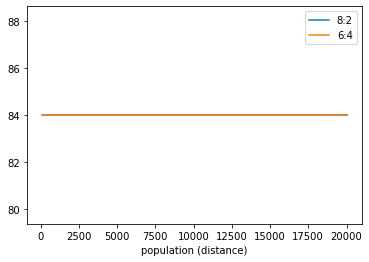

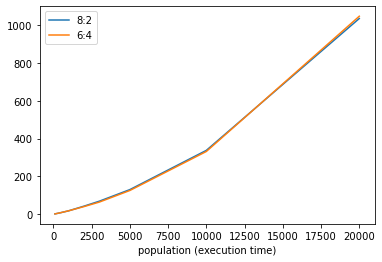

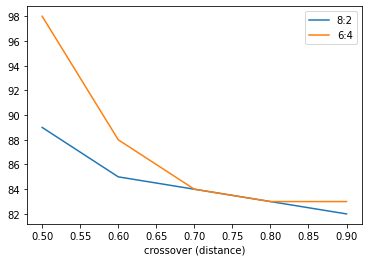

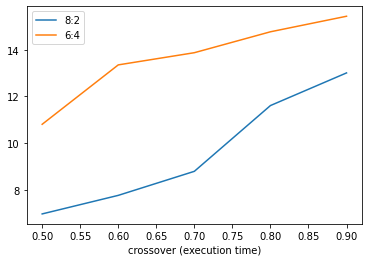

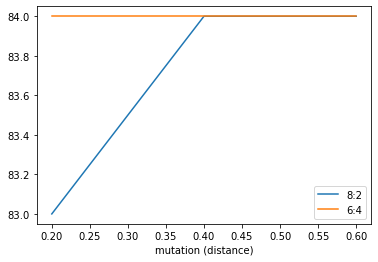

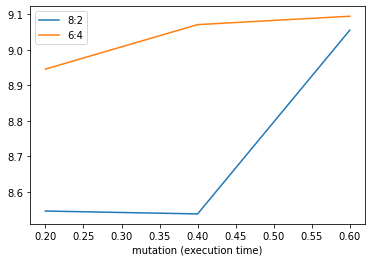

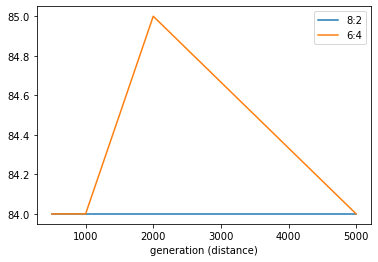

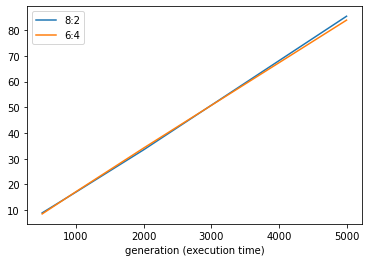

In [15]:
import matplotlib.pyplot as plt
import numpy as np



x = [100, 200, 500, 1000, 2000, 3000, 5000, 10000, 20000]
y1 = [84, 84, 84, 84, 84, 84, 84, 84, 84]
y2 = [84, 84, 84, 84, 84, 84, 84, 84, 84]
plt.plot(x, y1, label = "8:2") 
plt.plot(x, y2, label = "6:4")
plt.legend() 
plt.xlabel('population (distance)')
plt.show()

x = [100, 200, 500, 1000, 2000, 3000, 5000, 10000, 20000]
y1 = [1.6953644752502441, 3.3394875526428223, 8.538111209869385, 18.1035475730896, 42.63739991188049, 68.77065467834473, 130.140771150589, 337.5293695926666, 1034.6572387218475]
y2 = [1.598616361618042, 3.3278791904449463, 8.549723148345947, 18.088021755218506, 40.31901836395264, 64.0283432006836, 125.49782133102417, 331.6934609413147, 1046.6381194591522]
plt.plot(x, y1, label = "8:2") 
plt.plot(x, y2, label = "6:4")
plt.legend() 
plt.xlabel('population (execution time)')
plt.show()







x = [0.5, 0.6, 0.7, 0.8, 0.9]
y1 = [89, 85, 84, 83, 82]
y2 = [98, 88, 84, 83, 83]
plt.plot(x, y1, label = "8:2") 
plt.plot(x, y2, label = "6:4")
plt.legend() 
plt.xlabel('crossover (distance)')
plt.show()

x = [0.5, 0.6, 0.7, 0.8, 0.9]
y1 = [6.967265844345093, 7.76188588142395, 8.791666507720947, 11.609288454055786, 13.007681846618652]
y2 = [10.806436777114868, 13.351411581039429, 13.873546838760376, 14.769274473190308, 15.435235738754272]
plt.plot(x, y1, label = "8:2") 
plt.plot(x, y2, label = "6:4")
plt.legend() 
plt.xlabel('crossover (execution time)')
plt.show()




x = [0.2, 0.4, 0.6]
y1 = [83, 84, 84]
y2 = [84, 84, 84]
plt.plot(x, y1, label = "8:2") 
plt.plot(x, y2, label = "6:4")
plt.legend() 
plt.xlabel('mutation (distance)')
plt.show()

x = [0.2, 0.4, 0.6]
y1 = [8.546354293823242, 8.538275480270386, 9.055771350860596]
y2 = [8.946133613586426, 9.071451902389526, 9.095055103302002]
plt.plot(x, y1, label = "8:2") 
plt.plot(x, y2, label = "6:4")
plt.legend() 
plt.xlabel('mutation (execution time)')
plt.show()



x = [500, 1000, 2000, 5000]
y1 = [84, 84, 84, 84]
y2 = [84, 84, 85, 84]
plt.plot(x, y1, label = "8:2") 
plt.plot(x, y2, label = "6:4")
plt.legend() 
plt.xlabel('generation (distance)')
plt.show()

x = [500, 1000, 2000, 5000]
y1 = [8.91175103187561, 17.01285433769226, 33.45105218887329, 85.40087342262268]
y2 = [8.511826515197754, 17.165303945541382, 34.133167028427124, 83.88293027877808]
plt.plot(x, y1, label = "8:2") 
plt.plot(x, y2, label = "6:4")
plt.legend() 
plt.xlabel('generation (execution time)')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

figure, axis = plt.subplots(2, 2) 



x = [100, 200, 500, 1000, 2000, 3000, 5000, 10000, 20000]
y1 = [84, 84, 84, 84, 84, 84, 84, 84, 84]
y2 = [84, 84, 84, 84, 84, 84, 84, 84, 84]
plt.plot(x, y1, label = "8:2") 
plt.plot(x, y2, label = "6:4")
plt.legend() 
plt.xlabel('population (distance)')
plt.show()

x = [100, 200, 500, 1000, 2000, 3000, 5000, 10000, 20000]
y1 = [1.6953644752502441, 3.3394875526428223, 8.538111209869385, 18.1035475730896, 42.63739991188049, 68.77065467834473, 130.140771150589, 337.5293695926666, 1034.6572387218475]
y2 = [1.598616361618042, 3.3278791904449463, 8.549723148345947, 18.088021755218506, 40.31901836395264, 64.0283432006836, 125.49782133102417, 331.6934609413147, 1046.6381194591522]
plt.plot(x, y1, label = "8:2") 
plt.plot(x, y2, label = "6:4")
plt.legend() 
plt.xlabel('population (execution time)')
plt.show()







x = [0.5, 0.6, 0.7, 0.8, 0.9]
y1 = [95, 85, 84, 84, 84]
y2 = [99, 88, 84, 84, 84]
plt.plot(x, y1, label = "8:2") 
plt.plot(x, y2, label = "6:4")
plt.legend() 
plt.xlabel('crossover (distance)')
plt.show()

x = [0.5, 0.6, 0.7, 0.8, 0.9]
y1 = [5.873148441314697, 6.750182151794434, 7.596787691116333, 8.341545343399048, 9.392269611358643]
y2 = [6.568493366241455, 7.351117849349976, 8.050881147384644, 8.807594776153564, 9.541085004806519]
plt.plot(x, y1, label = "8:2") 
plt.plot(x, y2, label = "6:4")
plt.legend() 
plt.xlabel('crossover (execution time)')
plt.show()




x = [0.2, 0.4, 0.6]
y1 = [83, 84, 84]
y2 = [84, 84, 84]
plt.plot(x, y1, label = "8:2") 
plt.plot(x, y2, label = "6:4")
plt.legend() 
plt.xlabel('mutation (distance)')
plt.show()

x = [0.2, 0.4, 0.6]
y1 = [8.546354293823242, 8.538275480270386, 9.055771350860596]
y2 = [8.946133613586426, 9.071451902389526, 9.095055103302002]
plt.plot(x, y1, label = "8:2") 
plt.plot(x, y2, label = "6:4")
plt.legend() 
plt.xlabel('mutation (execution time)')
plt.show()



x = [500, 1000, 2000, 5000]
y1 = [84, 84, 84, 84]
y2 = [84, 84, 85, 84]
plt.plot(x, y1, label = "8:2") 
plt.plot(x, y2, label = "6:4")
plt.legend() 
plt.xlabel('generation (distance)')
plt.show()

x = [500, 1000, 2000, 5000]
y1 = [8.91175103187561, 17.01285433769226, 33.45105218887329, 85.40087342262268]
y2 = [8.511826515197754, 17.165303945541382, 34.133167028427124, 83.88293027877808]
plt.plot(x, y1, label = "8:2") 
plt.plot(x, y2, label = "6:4")
plt.legend() 
plt.xlabel('generation (execution time)')
plt.show()